# IS362 - Final Project - Analyzing Climate Data

For my final project, I am analyzing climate change data. In looking at what data was available to me, I decided to narrow down my focus to temperatures. Global warming has become a contentious debate, and I wanted to see if the data I was able to look at would provide a clear answer one war or the other. 

As always (and for the final time this semester!) I will import the modules that I will be using to complete this project. I'll be working with data frames, graphs, and images in this project.

In [73]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import Image

In [75]:
Image(url='http://www.theblackvault.com/documentarchive/wp-content/uploads/2015/03/8845010-stop-global-warming.jpg')

## NOAA Maximum Temperature Data

The first data source I'm using comes from the website of the National Centers for Environmental Information: https://www.ncdc.noaa.gov/monitoring-references/maps/us-climate-divisions.php

It contains a wide array of information about drought, precipitation, and temperatures. For now, I'm going to be focusing on the data for maximum temperatures.

Right out of the gate, I'm going to go ahead and give column headings to the columns which indicate the month in which the temperature was recorded.

In [4]:
maxtemp_data = pd.read_csv('ftp://ftp.ncdc.noaa.gov/pub/data/cirs/climdiv/climdiv-tmaxdv-v1.0.0-20170505',sep='  ', header=None, names=["StateDivElemYear","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
maxtemp_data.head()

C:\Users\Jessica\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


,StateDivElemYear,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0101271895,48.00,43.80,63.2,74.70,79.00,88.10,87.50,90.30,87.40,70.60,62.80,53.6
1,0101271896,49.10,53.90,59.1,79.20,86.50,86.00,91.10,94.50,86.90,72.30,65.60,54.3
2,0101271897,47.80,57.30,65.3,73.00,79.80,92.40,92.30,90.50,90.40,80.70,64.20,53.4
3,0101271898,54.60,53.30,66.9,68.20,86.10,92.30,91.20,89.80,86.20,70.00,58.30,51.2
4,0101271899,50.10,43.90,63.1,70.50,87.30,92.60,92.90,93.20,85.30,77.80,65.70,50.9


This result is fairly good, but the first column is going to be an issue. The first column has a unique value that is comprised of the State code for the state where the data was collected, the Division code, the Element code (which for all of the data points here is 27, indicating Maximum Temperature), and the year. Combined, this data isn't of much use to me, but separately, it would allow me to look at data for a specific state or year.

With this in mind, my next step was to separate that data into four separate columns so that I would be able to perform further analysis on the data.

In [12]:
maxtemp_data["StateDivElemYear"] = maxtemp_data.StateDivElemYear.astype(str)

maxtemp_data["State"] = maxtemp_data.StateDivElemYear.str[0] + maxtemp_data.StateDivElemYear.str[1]
maxtemp_data["Division"] = maxtemp_data.StateDivElemYear.str[2] + maxtemp_data.StateDivElemYear.str[3]
maxtemp_data["Element"] = maxtemp_data.StateDivElemYear.str[4] + maxtemp_data.StateDivElemYear.str[5]
maxtemp_data["Year"] = maxtemp_data.StateDivElemYear.str[6] + maxtemp_data.StateDivElemYear.str[7] + maxtemp_data.StateDivElemYear.str[8] + maxtemp_data.StateDivElemYear.str[9]
maxtemp_data.head()

,StateDivElemYear,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,State,Division,Element,Year
0,0101271895,48.00,43.80,63.2,74.70,79.00,88.10,87.50,90.30,87.40,70.60,62.80,53.6,01,01,27,1895
1,0101271896,49.10,53.90,59.1,79.20,86.50,86.00,91.10,94.50,86.90,72.30,65.60,54.3,01,01,27,1896
2,0101271897,47.80,57.30,65.3,73.00,79.80,92.40,92.30,90.50,90.40,80.70,64.20,53.4,01,01,27,1897
3,0101271898,54.60,53.30,66.9,68.20,86.10,92.30,91.20,89.80,86.20,70.00,58.30,51.2,01,01,27,1898
4,0101271899,50.10,43.90,63.1,70.50,87.30,92.60,92.90,93.20,85.30,77.80,65.70,50.9,01,01,27,1899


In [13]:
maxtemp_data = maxtemp_data[["State", "Division", "Element", "Year", "Jan", "Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]]
maxtemp_data.head()

,State,Division,Element,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,01,01,27,1895,48.00,43.80,63.2,74.70,79.00,88.10,87.50,90.30,87.40,70.60,62.80,53.6
1,01,01,27,1896,49.10,53.90,59.1,79.20,86.50,86.00,91.10,94.50,86.90,72.30,65.60,54.3
2,01,01,27,1897,47.80,57.30,65.3,73.00,79.80,92.40,92.30,90.50,90.40,80.70,64.20,53.4
3,01,01,27,1898,54.60,53.30,66.9,68.20,86.10,92.30,91.20,89.80,86.20,70.00,58.30,51.2
4,01,01,27,1899,50.10,43.90,63.1,70.50,87.30,92.60,92.90,93.20,85.30,77.80,65.70,50.9


I've now updated the data frame so that it's easier to work with. This was important because this data set is HUGE. It contains climate data for the various divisions of the 48 contiguous United States dating back to 1895. 

I'm also going to make sure that all of our data types are showing up as numerical values for when I try to plot this data.

In [33]:
maxtemp_data = maxtemp_data.convert_objects(convert_numeric=True)

C:\Users\Jessica\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


Now that we've cleaned up the data and put it in a format that is easier to work with, let's take a subset of the data to look at more closely. Since we're in New York, I've chosen to look at the data for New York State, which has a state code of 30. For the sake of clean graphs, I've also elected to work with a single division. 

### New York Temperature Data

In [66]:
nymaxtemp_data = maxtemp_data.loc[maxtemp_data["State"] == 30]
nymaxtemp_data = nymaxtemp_data.loc[maxtemp_data["Division"] == 1]
nymaxtemp_data.head()

,State,Division,Element,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
24231,30,1,27,1895,27.1,23.8,36.4,54.6,70.6,80.7,76.8,78.4,73.8,52.8,46.7,37.5
24232,30,1,27,1896,27.7,30.9,32.7,59.1,72.6,75.0,78.9,77.7,68.5,52.2,49.6,32.8
24233,30,1,27,1897,27.5,31.9,42.6,54.8,64.5,71.0,80.6,74.0,72.3,62.3,44.5,34.7
24234,30,1,27,1898,31.5,32.9,49.3,49.7,66.0,76.6,82.5,77.7,73.4,59.0,44.1,32.5
24235,30,1,27,1899,30.4,26.7,37.9,57.9,67.6,78.3,80.7,81.3,67.5,62.6,43.3,33.6


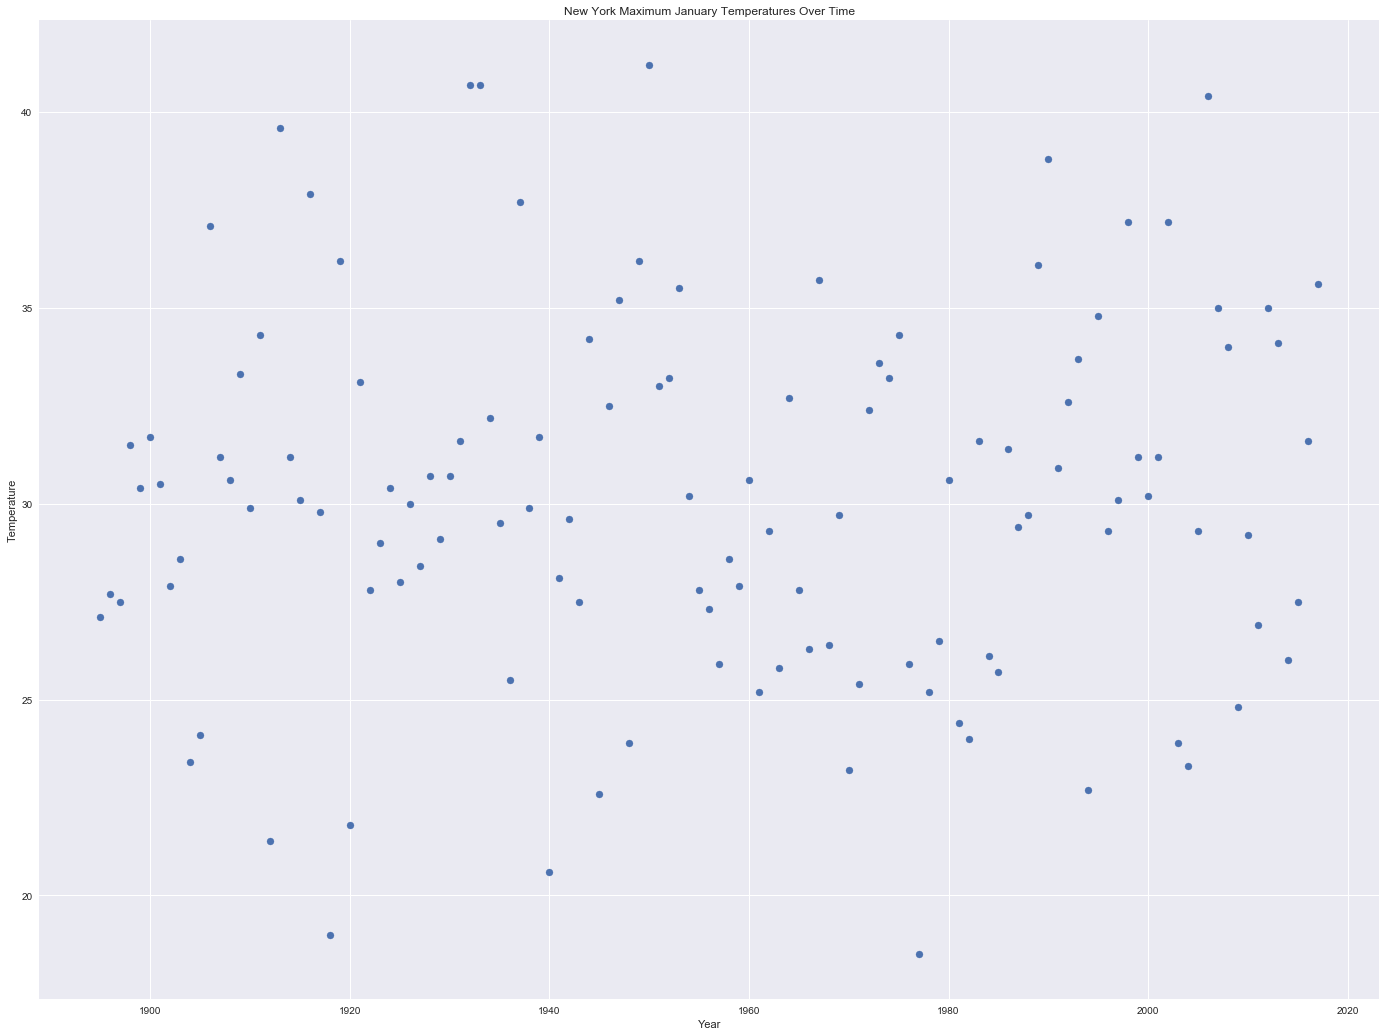

In [84]:
plt.scatter(nymaxtemp_data['Year'], nymaxtemp_data['Jan'])
plt.title('New York Maximum January Temperatures Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()

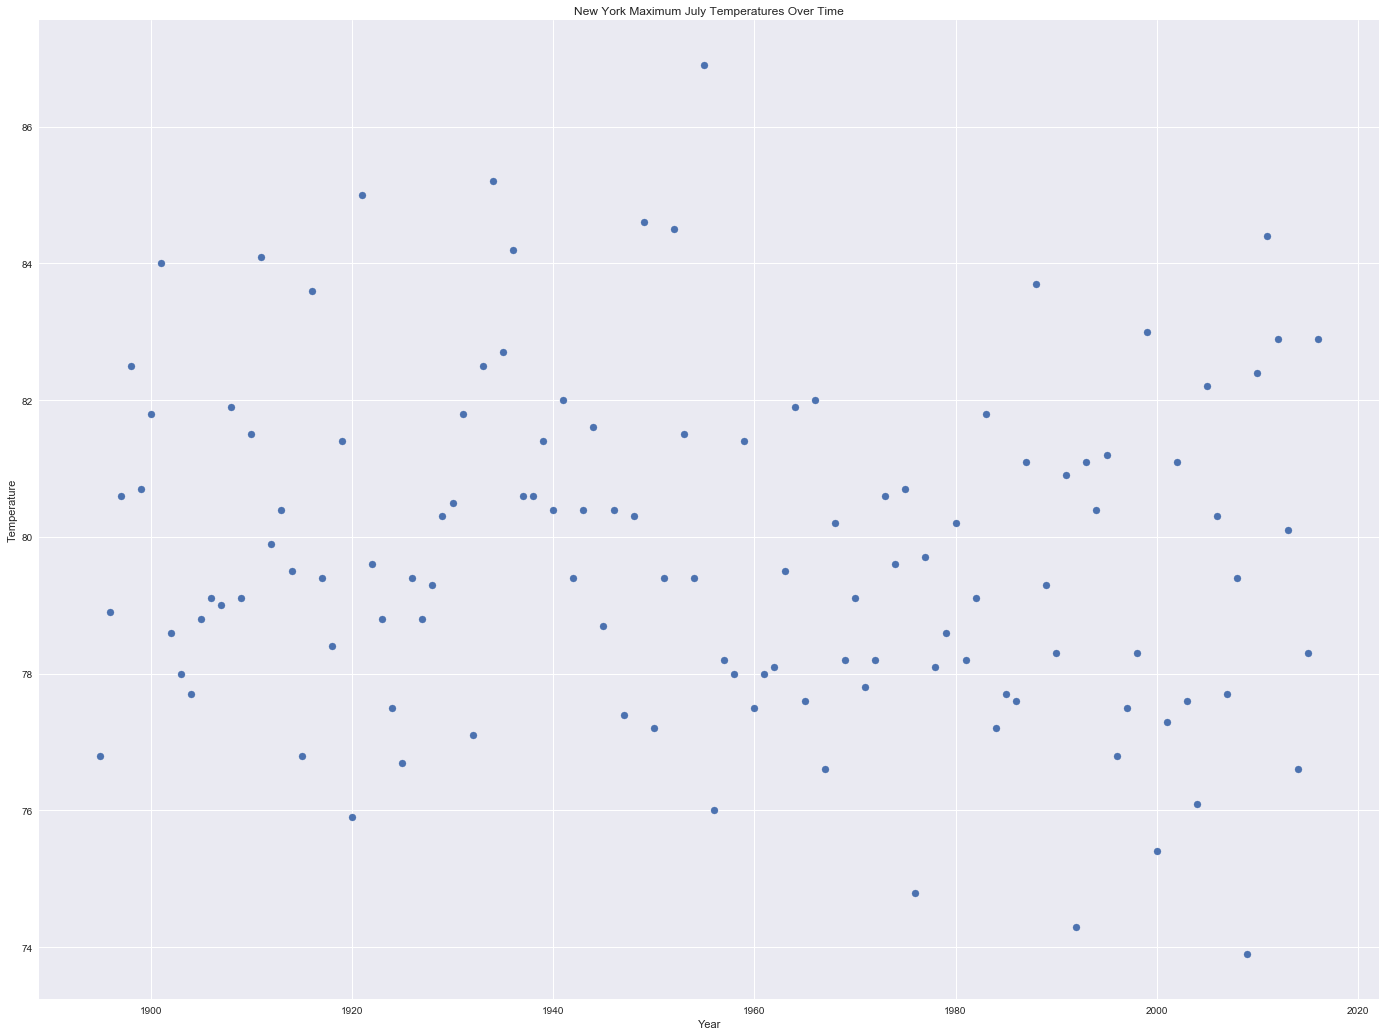

In [68]:
plt.scatter(nymaxtemp_data['Year'], nymaxtemp_data['Jul'])
plt.title('New York Maximum July Temperatures Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 24
fig_size[1] = 18
plt.rcParams["figure.figsize"] = fig_size
plt.show()

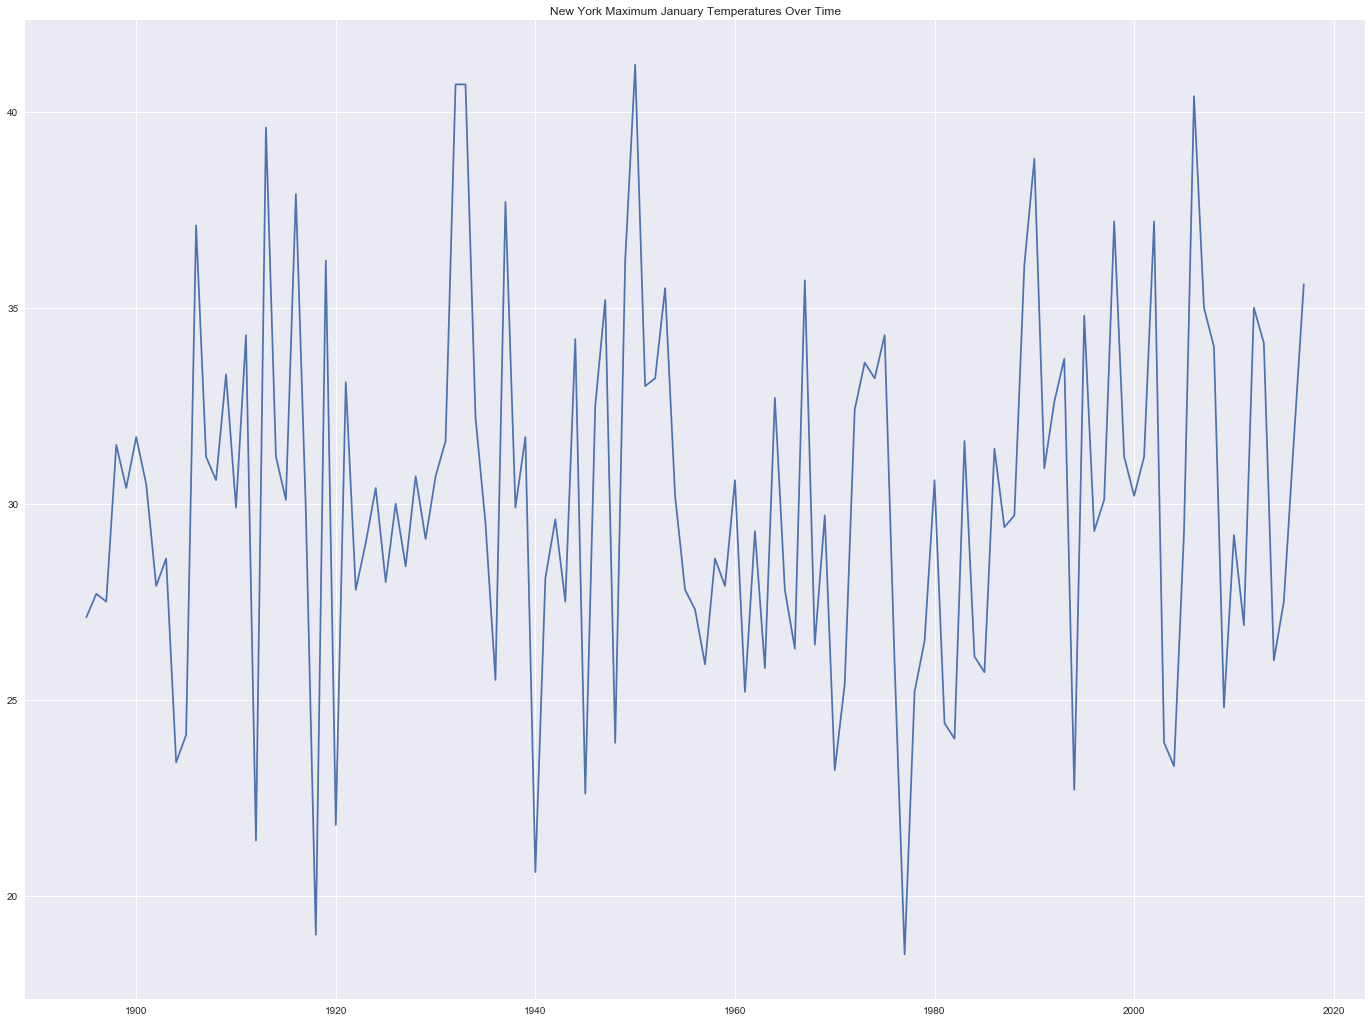

In [69]:
plt.plot(nymaxtemp_data["Year"], nymaxtemp_data["Jan"])
plt.title('New York Maximum January Temperatures Over Time')
plt.show()

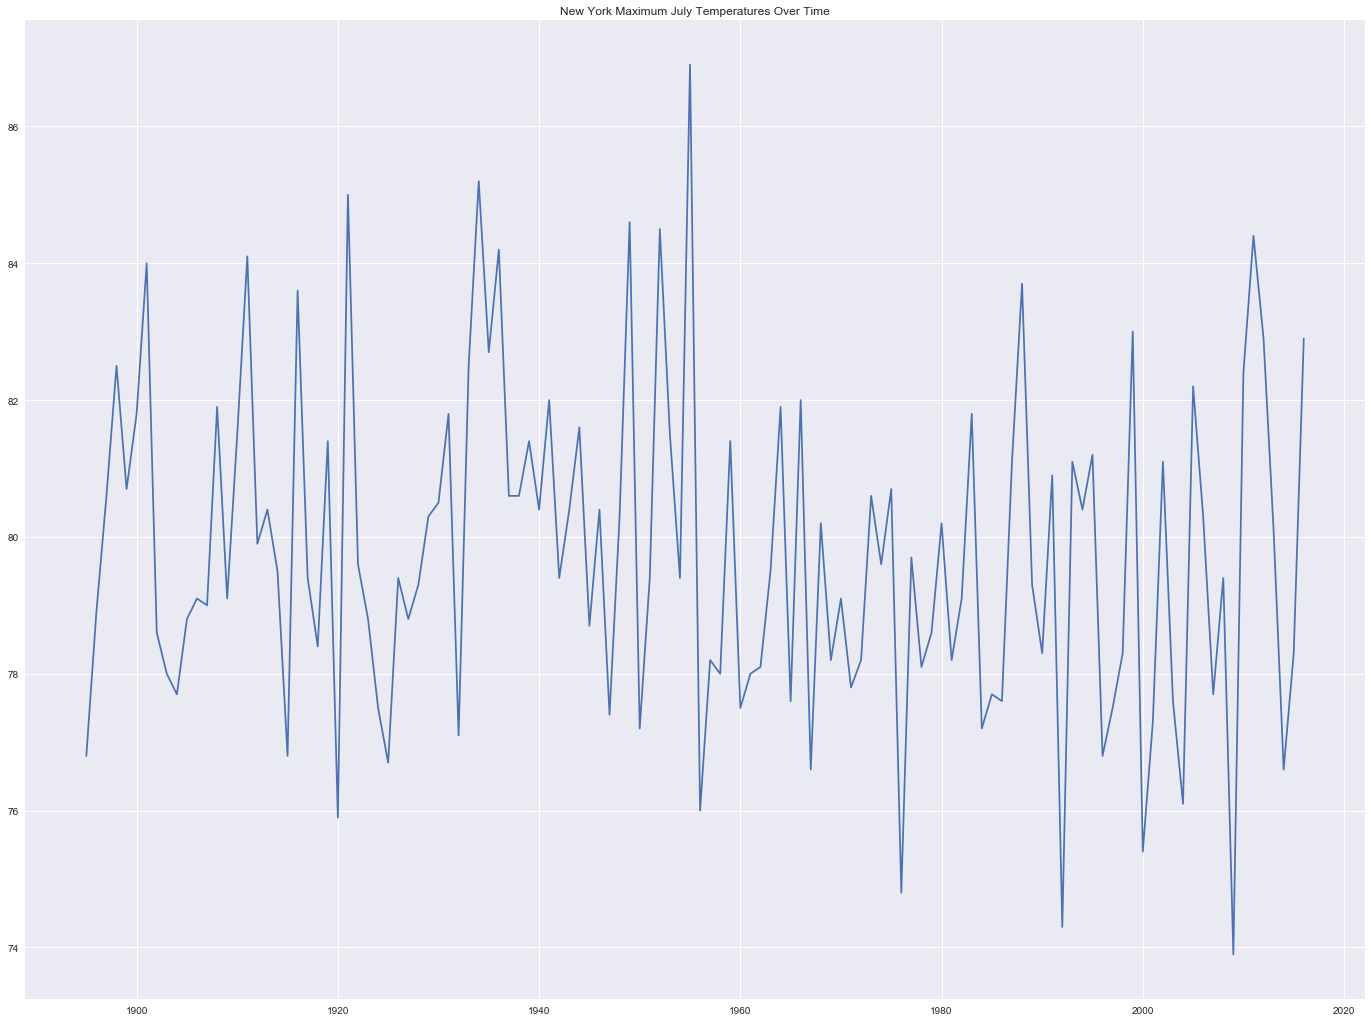

In [70]:
plt.plot(nymaxtemp_data["Year"], nymaxtemp_data["Jul"])
plt.title('New York Maximum July Temperatures Over Time')
plt.show()

The data did not necessarily present the clear cut answer I was expecting. When examining January temperatures, the most recent data did seem to be trending upward, but the July temperature data seemed to be trending downward. This would indicate warmer winters, but cooler summers. 

After looking at this data, I thought about what other state might give a clearer result, and recalled that California has been experiencing some particularly extreme weather of late, droughts in particular. So I repeated the analysis I did to gather the New York data to put together a data subset for California.

### California Temperature Data

In [77]:
camaxtemp_data = maxtemp_data.loc[maxtemp_data["State"] == 4]
camaxtemp_data = camaxtemp_data.loc[maxtemp_data["Division"] == 1]
camaxtemp_data.head()

,State,Division,Element,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2952,4,1,27,1895,43.9,52.3,53.5,59.7,65.2,76.3,79.1,80.4,70.6,68.7,54.2,44.2
2953,4,1,27,1896,48.1,54.3,53.5,51.0,59.9,74.9,83.5,79.3,73.2,66.8,48.9,49.0
2954,4,1,27,1897,45.9,46.7,45.9,63.3,71.0,71.2,80.2,81.6,72.7,64.2,50.6,47.1
2955,4,1,27,1898,43.2,50.3,52.5,62.4,62.5,73.3,81.6,81.6,74.2,64.0,53.7,46.5
2956,4,1,27,1899,47.8,49.3,50.9,58.7,60.0,73.9,81.4,75.0,78.8,60.2,53.2,46.1


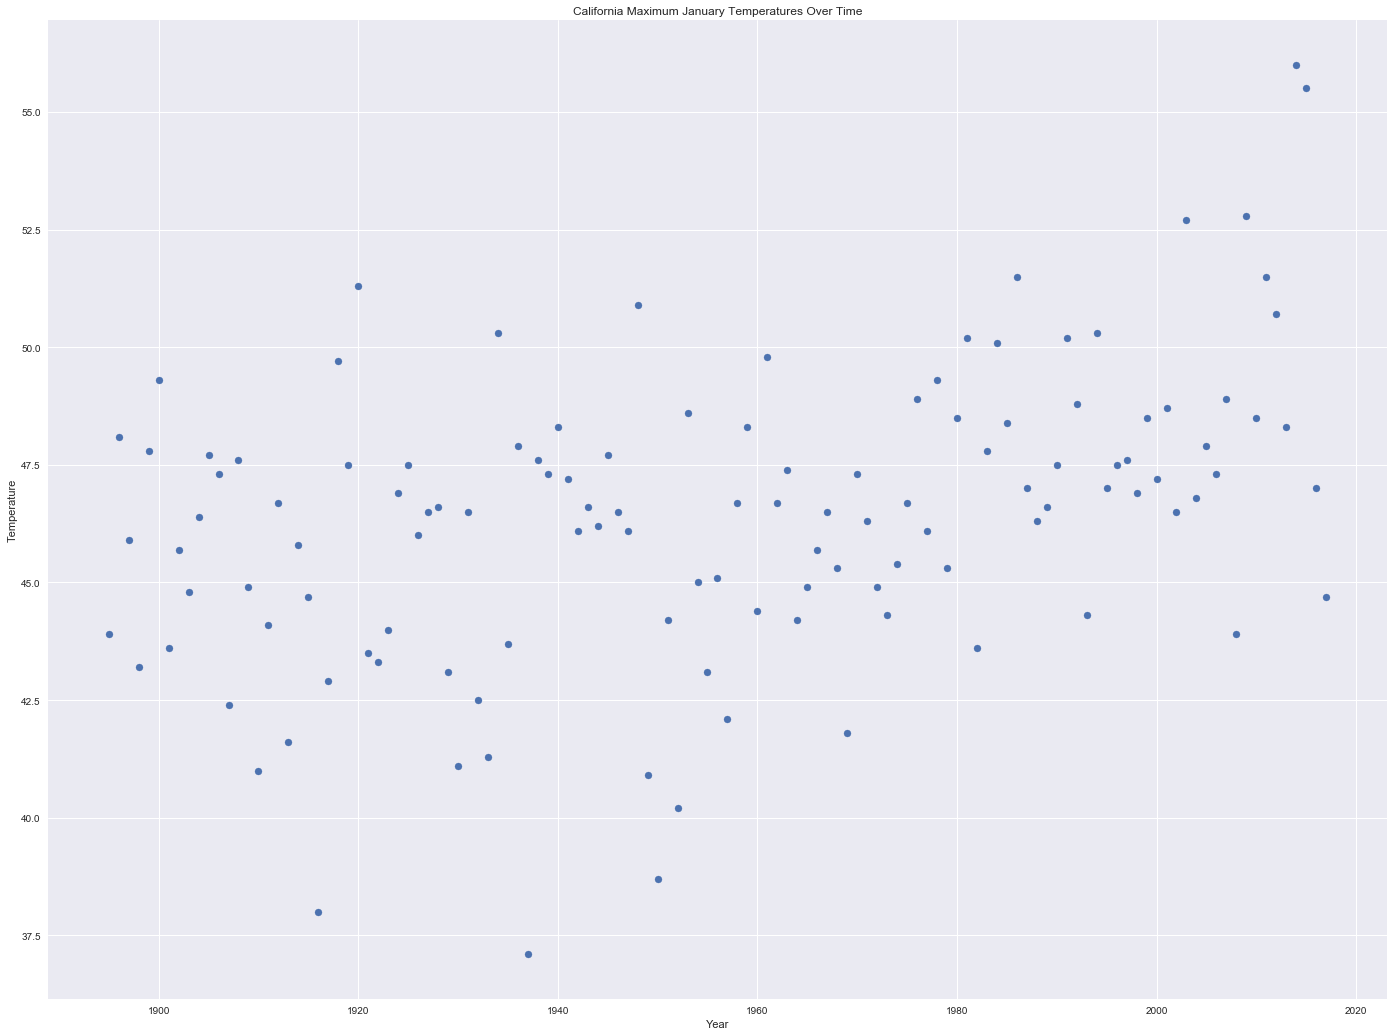

In [83]:
plt.scatter(camaxtemp_data['Year'], camaxtemp_data['Jan'])
plt.title('California Maximum January Temperatures Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()

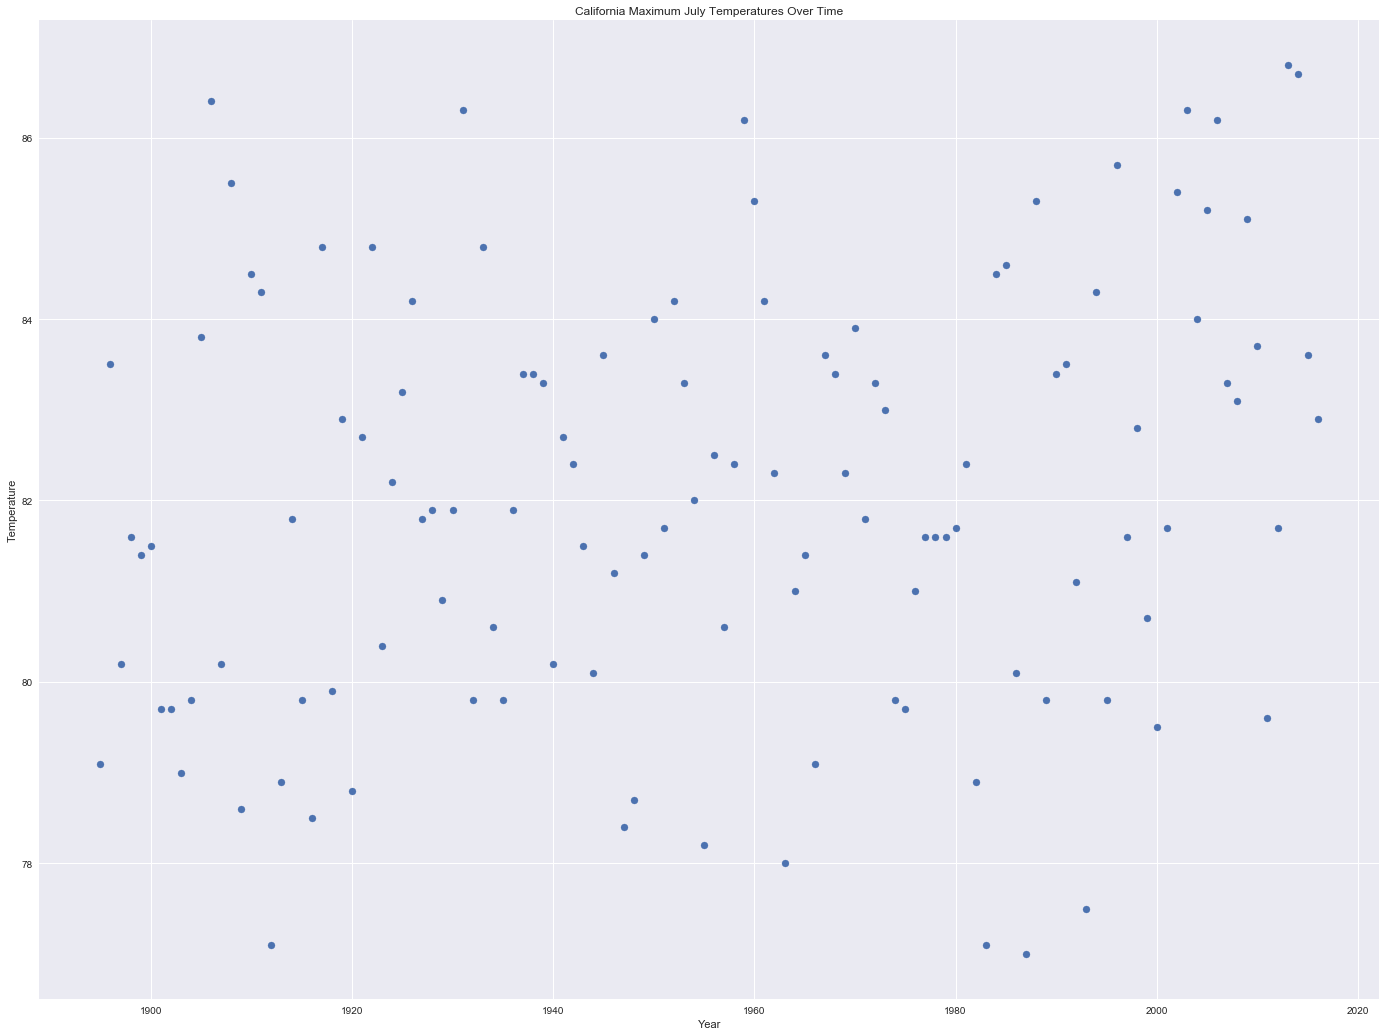

In [82]:
plt.scatter(camaxtemp_data['Year'], camaxtemp_data['Jul'])
plt.title('California Maximum July Temperatures Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()

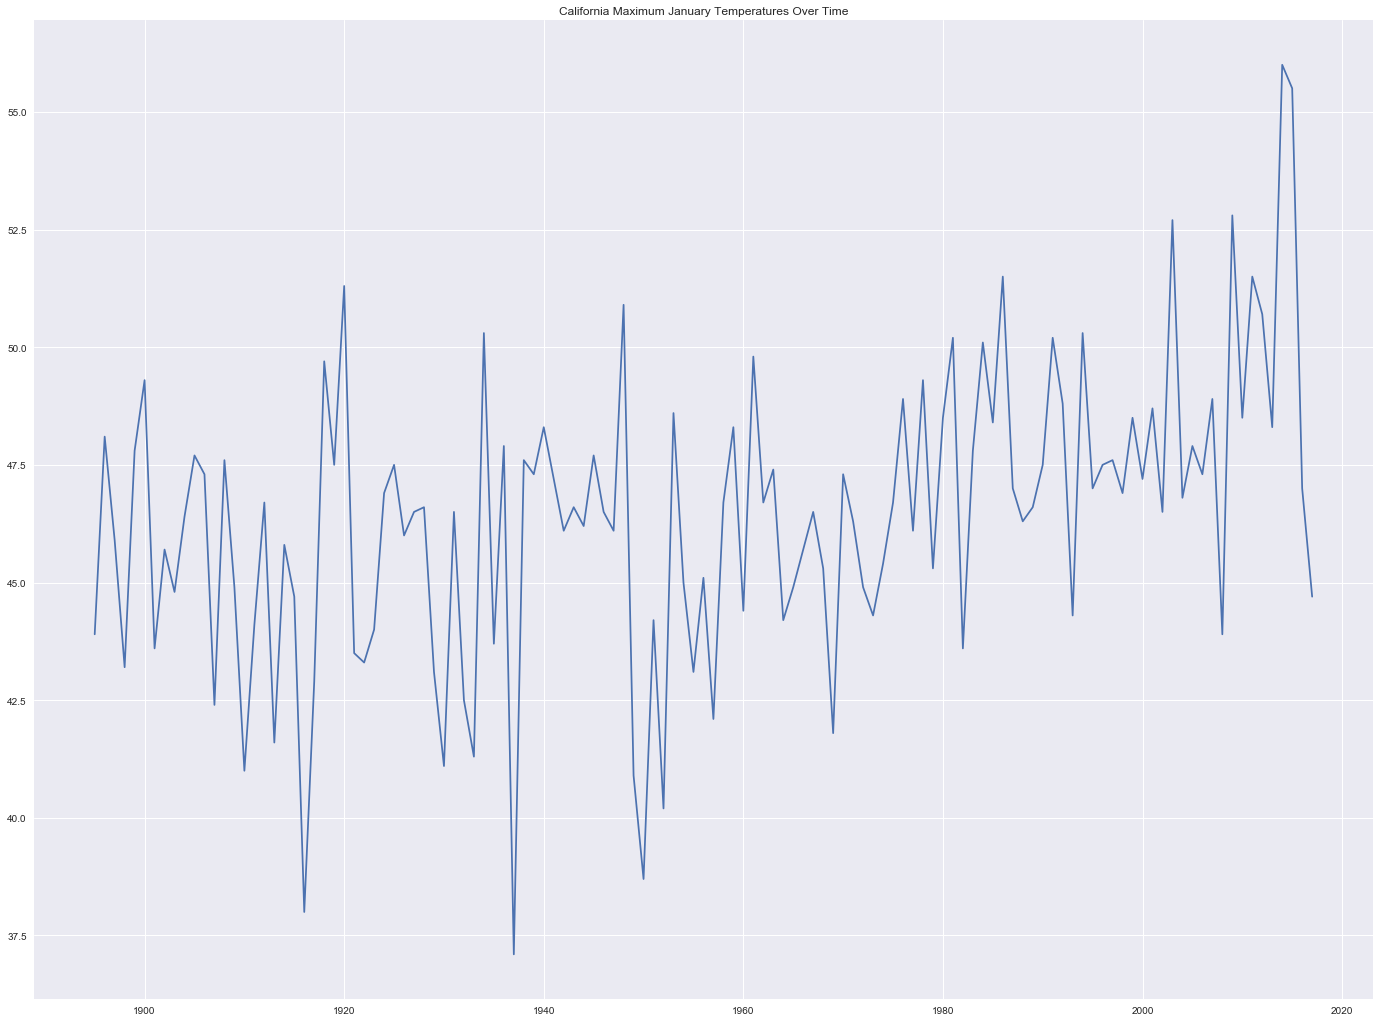

In [80]:
plt.plot(camaxtemp_data["Year"], camaxtemp_data["Jan"])
plt.title('California Maximum January Temperatures Over Time')
plt.show()

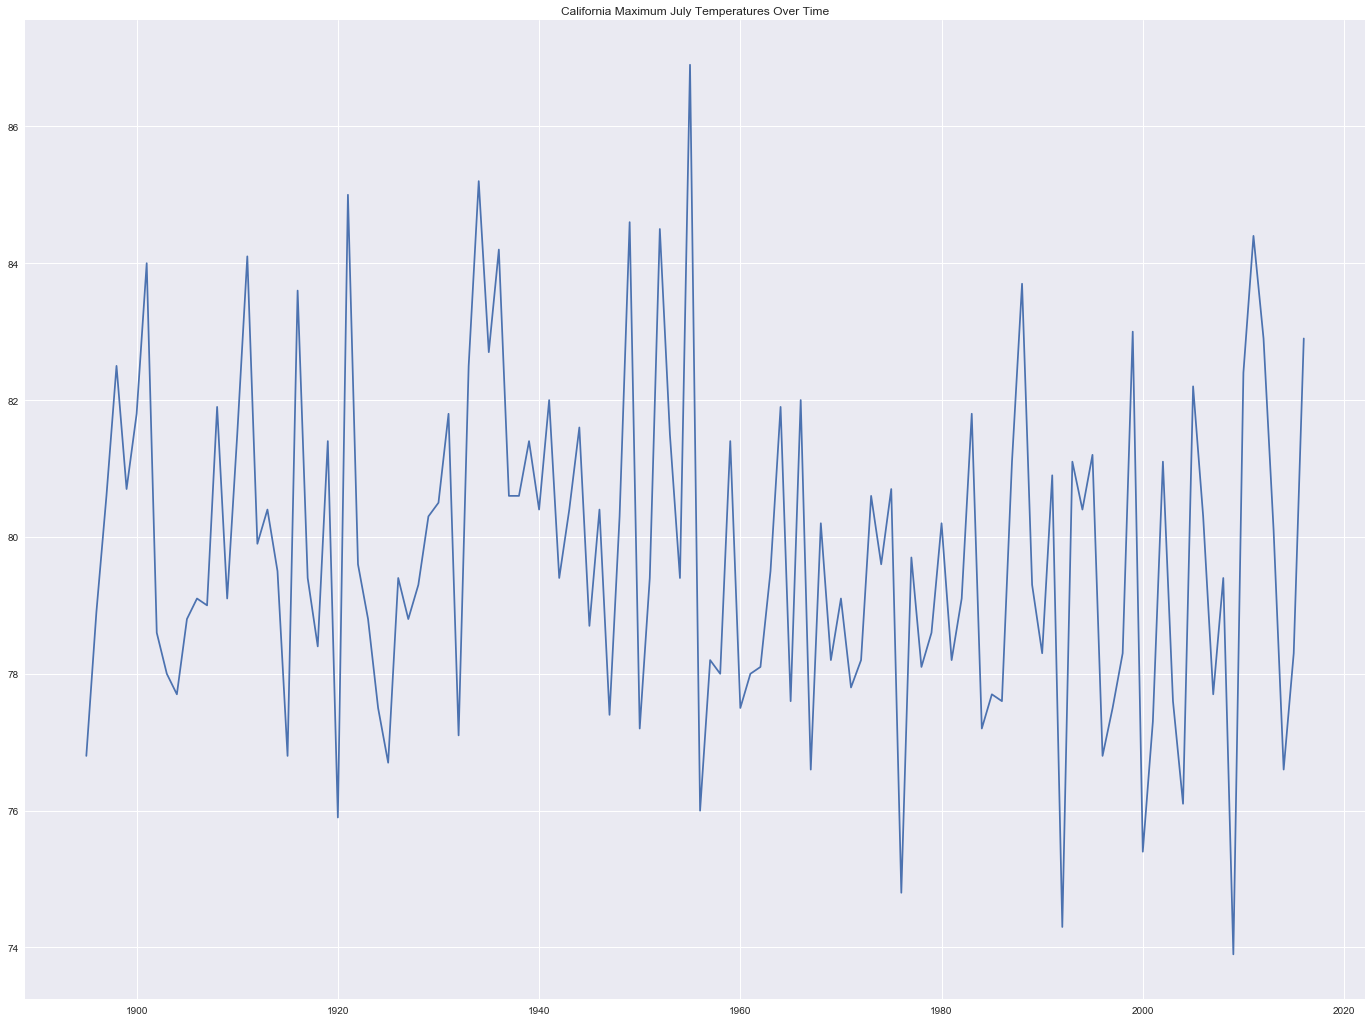

In [81]:
plt.plot(nymaxtemp_data["Year"], nymaxtemp_data["Jul"])
plt.title('California Maximum July Temperatures Over Time')
plt.show()

The trend was similar to what was seen in New York, though slightly more pronounced, with the winter temperatures getting noticeably warmer, while the summer temperatures being slightly cooler.

The last thing I wanted to do with this data set was look at the yearly average of all of the maximum temperatures, to see if there is a trend that can be seen.

In [85]:
maxtemp_data['Average'] = maxtemp_data.iloc[:, [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]].mean(axis=1)
maxtemp_data.head()

,State,Division,Element,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Average
0,1,1,27,1895,48.0,43.8,63.2,74.7,79.0,88.1,87.5,90.3,87.4,70.6,62.8,53.6,70.750000
1,1,1,27,1896,49.1,53.9,59.1,79.2,86.5,86.0,91.1,94.5,86.9,72.3,65.6,54.3,73.208333
2,1,1,27,1897,47.8,57.3,65.3,73.0,79.8,92.4,92.3,90.5,90.4,80.7,64.2,53.4,73.925000
3,1,1,27,1898,54.6,53.3,66.9,68.2,86.1,92.3,91.2,89.8,86.2,70.0,58.3,51.2,72.341667
4,1,1,27,1899,50.1,43.9,63.1,70.5,87.3,92.6,92.9,93.2,85.3,77.8,65.7,50.9,72.775000


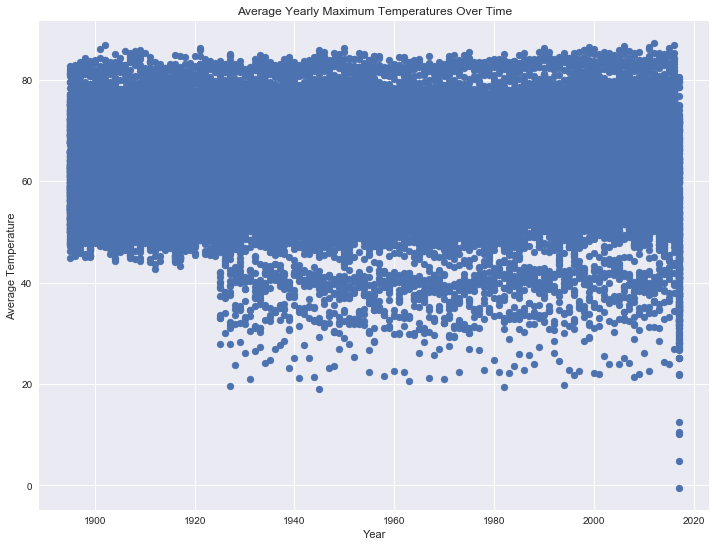

In [87]:
plt.scatter(maxtemp_data['Year'], maxtemp_data['Average'])
plt.title('Average Yearly Maximum Temperatures Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.show()

What was interesting here is that the data seems to be spreading out more over time, perhaps indicating more extreme temperatures.

## Berkeley Earth Earth Surface Temperature Data

The next data set that I will be working with comes from a CSV provided by Berkeley Earth which tracks the average temperature of the earth's surface. This data dates back to 1750. 

In [74]:
Image(url='https://www.kaggle.io/svf/195335/062aeda1473b00ec4b8505d5133dfc2c/__results___files/figure-html/unnamed-chunk-4-1.png')

In [88]:
avgsurfacetemp_data = pd.read_csv("C:/Users/Jessica/Desktop/John's School/IS362/IS362_FinalProject/GlobalTemperatures.csv")
avgsurfacetemp_data.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


The first thing that you'll notice about this data is that it has a lot of columns with no data. We're going to drop those from our data frame. 

In [91]:
avgsurfacetemp_data = avgsurfacetemp_data[["dt", "LandAverageTemperature", "LandAverageTemperatureUncertainty"]]
avgsurfacetemp_data.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574
1,1750-02-01,3.083,3.702
2,1750-03-01,5.626,3.076
3,1750-04-01,8.490,2.451
4,1750-05-01,11.573,2.072


The next thing is that we have a date column that has the month, day, and year all in one column. This is not the most helpful way to have this data. Additionally, all of the "Day" values are "01", making this field superfluous, as it can just be said that the data is always taken on the first of the month. 

In [95]:
avgsurfacetemp_data["dt"] = avgsurfacetemp_data.dt.astype(str)
avgsurfacetemp_data["Month"] = avgsurfacetemp_data.dt.str[5] + avgsurfacetemp_data.dt.str[6]
avgsurfacetemp_data["Day"] = avgsurfacetemp_data.dt.str[8] + avgsurfacetemp_data.dt.str[9]
avgsurfacetemp_data["Year"] = avgsurfacetemp_data.dt.str[0] + avgsurfacetemp_data.dt.str[1] + avgsurfacetemp_data.dt.str[2] + avgsurfacetemp_data.dt.str[3]

In [98]:
avgsurfacetemp_data = avgsurfacetemp_data[["Year", "Month", "LandAverageTemperature", "LandAverageTemperatureUncertainty"]]
avgsurfacetemp_data = avgsurfacetemp_data.convert_objects(convert_numeric=True)
avgsurfacetemp_data.head()

C:\Users\Jessica\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


,Year,Month,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,1,3.034,3.574
1,1750,2,3.083,3.702
2,1750,3,5.626,3.076
3,1750,4,8.490,2.451
4,1750,5,11.573,2.072


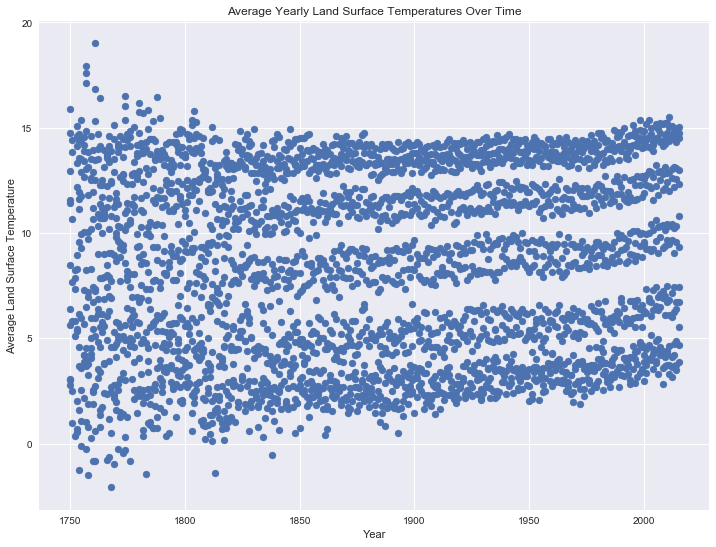

In [99]:
plt.scatter(avgsurfacetemp_data['Year'], avgsurfacetemp_data['LandAverageTemperature'])
plt.title('Average Yearly Land Surface Temperatures Over Time')
plt.xlabel('Year')
plt.ylabel('Average Land Surface Temperature')
plt.show()

This data painted a more clear picture of an upward trend. I'm also interested in breaking down this data by month, to see if there is any similarity to the trend we saw above, where we saw winters trending warmer and summers trending cooler. 

In [100]:
janavgsurfacetemp_data = avgsurfacetemp_data.loc[avgsurfacetemp_data["Month"] == 1]
febavgsurfacetemp_data = avgsurfacetemp_data.loc[avgsurfacetemp_data["Month"] == 2]
maravgsurfacetemp_data = avgsurfacetemp_data.loc[avgsurfacetemp_data["Month"] == 3]
apravgsurfacetemp_data = avgsurfacetemp_data.loc[avgsurfacetemp_data["Month"] == 4]
mayavgsurfacetemp_data = avgsurfacetemp_data.loc[avgsurfacetemp_data["Month"] == 5]
junavgsurfacetemp_data = avgsurfacetemp_data.loc[avgsurfacetemp_data["Month"] == 6]
julavgsurfacetemp_data = avgsurfacetemp_data.loc[avgsurfacetemp_data["Month"] == 7]
augavgsurfacetemp_data = avgsurfacetemp_data.loc[avgsurfacetemp_data["Month"] == 8]
sepavgsurfacetemp_data = avgsurfacetemp_data.loc[avgsurfacetemp_data["Month"] == 9]
octavgsurfacetemp_data = avgsurfacetemp_data.loc[avgsurfacetemp_data["Month"] == 10]
novavgsurfacetemp_data = avgsurfacetemp_data.loc[avgsurfacetemp_data["Month"] == 11]
decavgsurfacetemp_data = avgsurfacetemp_data.loc[avgsurfacetemp_data["Month"] == 12]

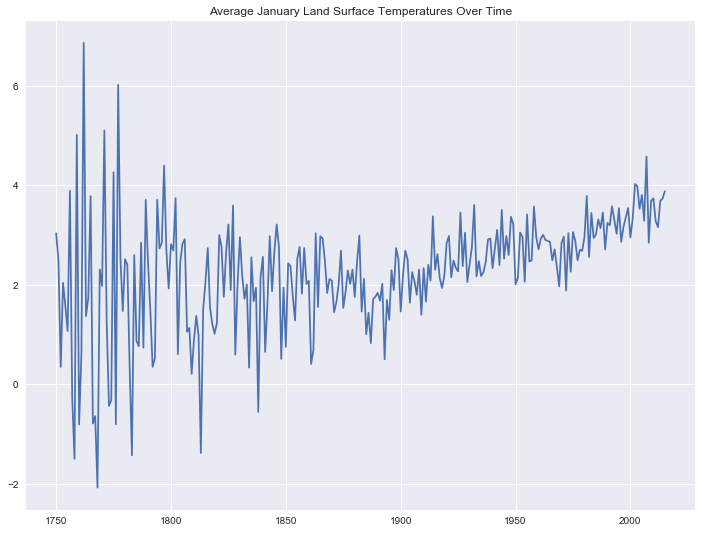

In [101]:
plt.plot(janavgsurfacetemp_data["Year"], janavgsurfacetemp_data["LandAverageTemperature"])
plt.title('Average January Land Surface Temperatures Over Time')
plt.show()

We can see here that the January temperatures are clearly trending upwards

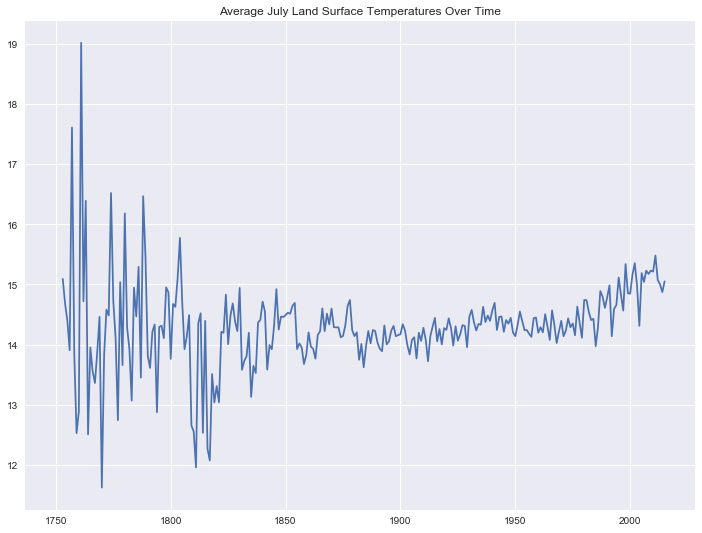

In [104]:
plt.plot(julavgsurfacetemp_data["Year"], julavgsurfacetemp_data["LandAverageTemperature"])
plt.title('Average July Land Surface Temperatures Over Time')
plt.show()

While there is less variation in the July temperatures, they are also trending warmer.

What might be interesting to find out about this data is why there is such a high degree of variation in earlier data while the more recent data seems to be very compact.

## Conclusions

Most of the data I analyzed seemed to support the conclusion that temperatures are rising. What is interesting to me was the July temperatures trending downward in some examples. I'd be curious to learn more about how the noticably warmer winters could impact the summer temperature.